<a href="https://colab.research.google.com/github/piaseckazaneta/data-science-bootcamp/blob/main/case_study_dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import bibliotek

In [2]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.26.4
Pandas: 2.1.4


Załadowanie danych

In [3]:
def fetch_financial_data(company='AMZN'):
  """Pobiera dane dotyczące notowań spółek na giełdzie wg symboli w serwisie stooq.pl"""
  import pandas_datareader.data as web
  return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1256 entries, 2024-08-27 to 2019-08-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1256 non-null   float64
 1   High    1256 non-null   float64
 2   Low     1256 non-null   float64
 3   Close   1256 non-null   float64
 4   Volume  1256 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2024-08-26,176.7000,177.4682,174.3000,175.5000,22366236
2024-08-23,177.3400,178.9699,175.2400,177.0400,29150091
2024-08-22,181.3800,181.4700,175.6800,176.1300,32047482
2024-08-21,179.9200,182.3850,178.8937,180.1100,35599120
2024-08-20,177.9200,179.0100,177.4308,178.8800,26255204
...,...,...,...,...,...
2019-09-05,91.0975,92.1000,90.7790,92.0360,66503780
2019-09-04,90.2500,90.3815,89.8115,90.0310,46524560
2019-09-03,88.5000,90.0400,88.4000,89.4920,70937180


In [ ]:
df.head() #metoda zwraca domyśłnie 5 pierwszych wierszy
df.head(10) #metoda zwróci 10 pierwszych wierszy, można wstawić dowolną potrzebną liczbę wierszy

,Open,High,Low,Close,Volume
Date,,,,,
2024-08-26,176.70,177.4682,174.3000,175.50,22366236
2024-08-23,177.34,178.9699,175.2400,177.04,29150091
2024-08-22,181.38,181.4700,175.6800,176.13,32047482
2024-08-21,179.92,182.3850,178.8937,180.11,35599120
2024-08-20,177.92,179.0100,177.4308,178.88,26255204
2024-08-19,177.64,178.3000,176.1600,178.22,31129807
2024-08-16,177.04,178.3400,176.2601,177.06,31489175
2024-08-15,174.86,177.9100,173.9900,177.59,51698513
2024-08-14,172.11,172.2800,168.8600,170.10,28843804


In [ ]:
df.tail() #zwraca domyślnie 5 ostatnich obiektów z dataframe

,Open,High,Low,Close,Volume
Date,,,,,
2019-09-05,91.0975,92.1000,90.7790,92.0360,66503780
2019-09-04,90.2500,90.3815,89.8115,90.0310,46524560
2019-09-03,88.5000,90.0400,88.4000,89.4920,70937180
2019-08-30,89.8745,89.9870,88.2285,88.8145,61282940
2019-08-29,89.1500,89.9275,88.8625,89.3200,60360240


In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
# Zamiana pierwszych liter nazw kolumn z wielkich na małe - KONSTRUKCJA DO ZAPAMIĘTANIA!
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [ ]:
df.describe() #wyświetla ogólne statystyki dla dataframe

,open,high,low,close,volume
count,1256.000000,1256.000000,1256.000000,1256.000000,1.256000e+03
mean,139.147558,140.843605,137.337539,139.110350,7.014459e+07
std,31.515343,31.667702,31.239717,31.423644,3.335357e+07
min,82.075500,83.480000,81.301600,81.820000,1.762674e+07
25%,110.353750,113.218500,107.950250,110.572500,4.844709e+07
50%,145.500000,147.549950,143.892500,145.845000,6.155571e+07
75%,165.460750,166.951250,163.707250,165.217750,8.248259e+07
max,200.090000,201.200000,199.045000,200.000000,3.113457e+08


In [ ]:
df.describe().T #transpozycja tabeli ze statystykami

,count,mean,std,min,25%,50%,75%,max
open,1256.0,1.391476e+02,3.151534e+01,8.207550e+01,1.103538e+02,1.455000e+02,1.654607e+02,2.000900e+02
high,1256.0,1.408436e+02,3.166770e+01,8.348000e+01,1.132185e+02,1.475499e+02,1.669513e+02,2.012000e+02
low,1256.0,1.373375e+02,3.123972e+01,8.130160e+01,1.079502e+02,1.438925e+02,1.637072e+02,1.990450e+02
close,1256.0,1.391103e+02,3.142364e+01,8.182000e+01,1.105725e+02,1.458450e+02,1.652177e+02,2.000000e+02
volume,1256.0,7.014459e+07,3.335357e+07,1.762674e+07,4.844709e+07,6.155571e+07,8.248259e+07,3.113457e+08


Selekcja kolumn

In [ ]:
# Aby móc uczyć się na tabeli, wycinamy 10 pierwszych wierszy
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2024-08-26,176.70,177.4682,174.3000,175.50,22366236
2024-08-23,177.34,178.9699,175.2400,177.04,29150091
2024-08-22,181.38,181.4700,175.6800,176.13,32047482
2024-08-21,179.92,182.3850,178.8937,180.11,35599120
2024-08-20,177.92,179.0100,177.4308,178.88,26255204
2024-08-19,177.64,178.3000,176.1600,178.22,31129807
2024-08-16,177.04,178.3400,176.2601,177.06,31489175
2024-08-15,174.86,177.9100,173.9900,177.59,51698513
2024-08-14,172.11,172.2800,168.8600,170.10,28843804


In [ ]:
# Wycinanie kolumny 'open' - dostajemy obiekt typu Series
df['open']

,open
Date,
2024-08-26,176.70
2024-08-23,177.34
2024-08-22,181.38
2024-08-21,179.92
2024-08-20,177.92
2024-08-19,177.64
2024-08-16,177.04
2024-08-15,174.86
2024-08-14,172.11


In [ ]:
# inny sposób, też w wyniku obiekt typu Series
df.open

,open
Date,
2024-08-26,176.70
2024-08-23,177.34
2024-08-22,181.38
2024-08-21,179.92
2024-08-20,177.92
2024-08-19,177.64
2024-08-16,177.04
2024-08-15,174.86
2024-08-14,172.11


In [ ]:
df[['open']] #wynik jako dataframe

,open
Date,
2024-08-26,176.70
2024-08-23,177.34
2024-08-22,181.38
2024-08-21,179.92
2024-08-20,177.92
2024-08-19,177.64
2024-08-16,177.04
2024-08-15,174.86
2024-08-14,172.11


In [ ]:
#Sposób na selekcję kolumny z metodą iloc / iloc działa na indeksach
df.iloc[:,0]

,open
Date,
2024-08-26,176.70
2024-08-23,177.34
2024-08-22,181.38
2024-08-21,179.92
2024-08-20,177.92
2024-08-19,177.64
2024-08-16,177.04
2024-08-15,174.86
2024-08-14,172.11


In [ ]:
#Jak chcemy metodą iloc wyciąć 2 kolumny to musimy podać listę
df.iloc[:, [0,3]]

,open,close
Date,,
2024-08-26,176.70,175.50
2024-08-23,177.34,177.04
2024-08-22,181.38,176.13
2024-08-21,179.92,180.11
2024-08-20,177.92,178.88
2024-08-19,177.64,178.22
2024-08-16,177.04,177.06
2024-08-15,174.86,177.59
2024-08-14,172.11,170.10


In [ ]:
#Wycinanie ostatniej kolumny
df.iloc[:, -1]

,volume
Date,
2024-08-26,22366236
2024-08-23,29150091
2024-08-22,32047482
2024-08-21,35599120
2024-08-20,26255204
2024-08-19,31129807
2024-08-16,31489175
2024-08-15,51698513
2024-08-14,28843804


In [ ]:
#Jak chcemy wyciąć ostatnią kolumnę przez iloc i otrzymać dataframe, to stosujemy listę
df.iloc[:, [-1]]

,volume
Date,
2024-08-26,22366236
2024-08-23,29150091
2024-08-22,32047482
2024-08-21,35599120
2024-08-20,26255204
2024-08-19,31129807
2024-08-16,31489175
2024-08-15,51698513
2024-08-14,28843804


In [ ]:
#Wycinanie 3 ostatnich kolumn
df.iloc[:, -3:]

,low,close,volume
Date,,,
2024-08-26,174.3000,175.50,22366236
2024-08-23,175.2400,177.04,29150091
2024-08-22,175.6800,176.13,32047482
2024-08-21,178.8937,180.11,35599120
2024-08-20,177.4308,178.88,26255204
2024-08-19,176.1600,178.22,31129807
2024-08-16,176.2601,177.06,31489175
2024-08-15,173.9900,177.59,51698513
2024-08-14,168.8600,170.10,28843804


Selekcja wierszy

In [ ]:
df.iloc[0]

,2024-08-26
open,1.767000e+02
high,1.774682e+02
low,1.743000e+02
close,1.755000e+02
volume,2.236624e+07


In [ ]:
#Wycinanie 3 pierwszych wierszy
df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2024-08-26,176.70,177.4682,174.30,175.50,22366236
2024-08-23,177.34,178.9699,175.24,177.04,29150091
2024-08-22,181.38,181.4700,175.68,176.13,32047482


In [ ]:
#Wycinanie po nazwie wiersza za pomocą metody loc
df.loc['2024-08-23']

,2024-08-23
open,1.773400e+02
high,1.789699e+02
low,1.752400e+02
close,1.770400e+02
volume,2.915009e+07


Obliczanie nowych kolumn

In [4]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1256 entries, 2024-08-27 to 2019-08-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1256 non-null   float64
 1   High    1256 non-null   float64
 2   Low     1256 non-null   float64
 3   Close   1256 non-null   float64
 4   Volume  1256 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1256 entries, 2024-08-27 to 2019-08-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1256 non-null   float64
 1   High    1256 non-null   float64
 2   Low     1256 non-null   float64
 3   Close   1256 non-null   float64
 4   Volume  1256 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,1256.000000,1256.000000,1256.000000,1256.000000,1.256000e+03
mean,42.369016,43.167840,41.546996,42.371011,2.506379e+07
std,14.531784,14.635783,14.380397,14.497520,1.754698e+07
min,15.960000,17.800000,13.710000,14.820000,5.021190e+06
25%,31.145000,31.796250,30.470000,31.165000,1.596514e+07
50%,38.320000,38.995000,37.502500,38.250000,2.101648e+07
75%,50.622500,51.459975,49.720000,50.760000,2.899000e+07
max,81.940000,82.140000,80.790000,81.390000,3.642612e+08


In [5]:
#Tworzenie nowej kolumny ze średnią z cen open i close
df['Average'] = (df.Open + df.Close)/2.0
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2024-08-27,72.49,73.090,71.80,72.56,7294117,72.525
2024-08-26,74.30,74.300,72.11,72.61,10999937,73.455
2024-08-23,72.85,74.455,72.35,74.30,13065551,73.575
2024-08-22,73.55,74.120,72.67,73.31,9571940,73.430
2024-08-21,73.72,74.290,73.06,73.48,9290198,73.600


In [ ]:
#Obliczenie dziennej zmiany procentowej
# Najpierw posortowanie, aby najstarsze były na początku
#Użyjemy metodę sort_index()-  dostajemy w wyniku obiekt data_frame

df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-08-30,33.00,33.13,32.040,32.57,6636847,32.785
2019-09-03,32.10,32.53,30.665,30.70,12194312,31.400
2019-09-04,30.91,32.36,30.850,31.99,10367329,31.450
2019-09-05,32.33,33.03,32.250,32.51,7938083,32.420
2019-09-06,32.71,32.74,31.410,31.86,7035967,32.285


In [6]:
#Obliczenie dziennej zmiany procentowej zaczniemy od drugiego wiersza, bo dla pierwszego nie mamy już teog dnia wcześniej
#Użyjemy metody shift(), która pozwoli nam przesunąć nasze dane o jeden wiersz
df['Close_shift'] = df.Close.shift(1)
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2024-08-27,72.49,73.090,71.80,72.56,7294117,72.525,NaN
2024-08-26,74.30,74.300,72.11,72.61,10999937,73.455,72.56
2024-08-23,72.85,74.455,72.35,74.30,13065551,73.575,72.61
2024-08-22,73.55,74.120,72.67,73.31,9571940,73.430,74.30
2024-08-21,73.72,74.290,73.06,73.48,9290198,73.600,73.31


In [7]:
df['Daily_change'] = df.Close / df.Close_shift - 1
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2024-08-27,72.49,73.090,71.80,72.56,7294117,72.525,NaN,NaN
2024-08-26,74.30,74.300,72.11,72.61,10999937,73.455,72.56,0.000689
2024-08-23,72.85,74.455,72.35,74.30,13065551,73.575,72.61,0.023275
2024-08-22,73.55,74.120,72.67,73.31,9571940,73.430,74.30,-0.013324
2024-08-21,73.72,74.290,73.06,73.48,9290198,73.600,73.31,0.002319


In [ ]:
#Usuwanie kolumny - tylko dla pokazania sposobu usuwania

del df['Daily_change']

In [ ]:
df.Daily_change.min()

-0.21628767847699626

<Axes: >

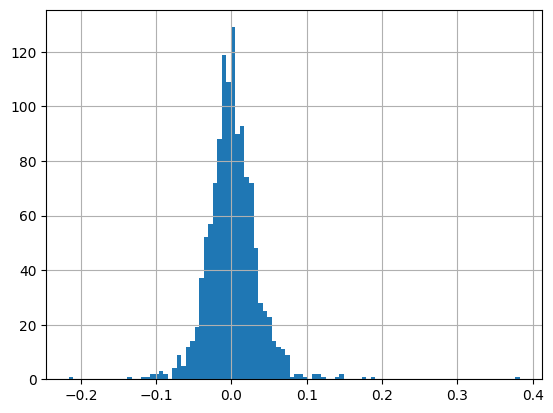

In [ ]:
#Szybkie wyświetlenie histogramu

df.Daily_change.hist(bins=100)

<Axes: >

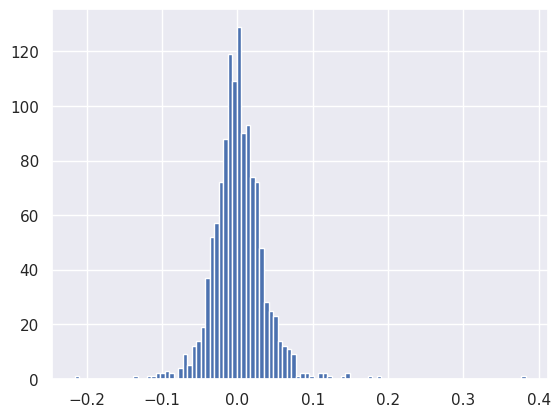

In [ ]:
import seaborn as sns
sns.set()

# to samo co wyżej, tyle że przy ustawieniach seaborn
df.Daily_change.hist(bins=100)

<Axes: xlabel='Date'>

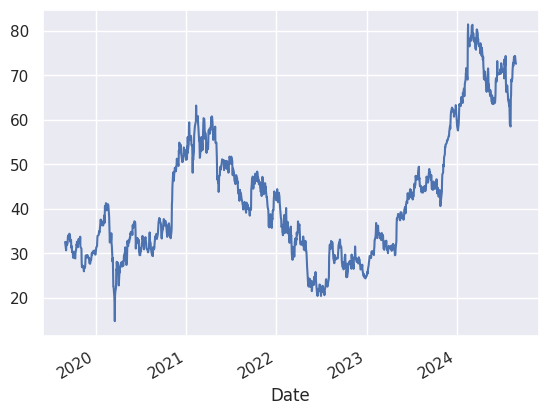

In [ ]:
df.Close.plot()

Filtrowanie danych

In [8]:
#Chcemy wyselekcjonować z daily_change te dni, w których otrzymano dodatnią stopę zwrotu
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2024-08-27,72.49,73.090,71.80,72.56,7294117,72.525,NaN,NaN
2024-08-26,74.30,74.300,72.11,72.61,10999937,73.455,72.56,0.000689
2024-08-23,72.85,74.455,72.35,74.30,13065551,73.575,72.61,0.023275
2024-08-22,73.55,74.120,72.67,73.31,9571940,73.430,74.30,-0.013324
2024-08-21,73.72,74.290,73.06,73.48,9290198,73.600,73.31,0.002319


In [12]:
df.Daily_change > 0 # w wyniku otrzymamy maskę logiczną
# Aby otrzymać dataframe z dniami o dodatniej stopie zwrotu, dokonujemy selekcji w oparciu o powyższą maskę
df_positive = df[df.Daily_change > 0]
df_positive

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2024-08-26,74.30,74.3000,72.110,72.61,10999937,73.455,72.56,0.000689
2024-08-23,72.85,74.4550,72.350,74.30,13065551,73.575,72.61,0.023275
2024-08-21,73.72,74.2900,73.060,73.48,9290198,73.600,73.31,0.002319
2024-08-19,72.00,74.2200,71.795,74.18,13821265,73.090,73.31,0.011867
2024-08-15,72.51,73.4200,72.290,72.73,13711340,72.620,72.04,0.009578
...,...,...,...,...,...,...,...,...
2019-09-17,34.75,34.7500,33.550,34.29,5588258,34.520,34.26,0.000876
2019-09-16,33.60,34.8000,33.470,34.43,7942590,34.015,34.29,0.004083
2019-09-12,34.14,34.4862,33.330,34.07,7734849,34.105,33.25,0.024662


In [13]:
#Obliczenie średniej wartości dodatniej stopy zwrotu
df_positive.Daily_change.mean()

0.023625060156793082

In [15]:
# Teraz chcemy sprawdzić, czy cena Close była kiedyś równa najwyższej cenie
# to nas informuje, że w ciągu danej sesji giełdowej, notowania spółki zamknęły się na maximum
df.Close == df.High

,0
Date,
2024-08-27,False
2024-08-26,False
2024-08-23,False
2024-08-22,False
2024-08-21,False
...,...
2019-09-06,False
2019-09-05,False
2019-09-04,False


In [16]:
# Wybieranie konkretnych dni z wykorzystaniem biblioteki pandas
df.index #sprawdzamy, po jakiej kolumnie jest indeksowanie / tu po datach / możemy selekcjonować więc po dacie

DatetimeIndex(['2024-08-27', '2024-08-26', '2024-08-23', '2024-08-22',
               '2024-08-21', '2024-08-20', '2024-08-19', '2024-08-16',
               '2024-08-15', '2024-08-14',
               ...
               '2019-09-13', '2019-09-12', '2019-09-11', '2019-09-10',
               '2019-09-09', '2019-09-06', '2019-09-05', '2019-09-04',
               '2019-09-03', '2019-08-30'],
              dtype='datetime64[ns]', name='Date', length=1256, freq=None)

In [18]:
df[df.index >= '2019-11-01']

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2024-08-27,72.49,73.090,71.800,72.56,7294117,72.525,NaN,NaN
2024-08-26,74.30,74.300,72.110,72.61,10999937,73.455,72.56,0.000689
2024-08-23,72.85,74.455,72.350,74.30,13065551,73.575,72.61,0.023275
2024-08-22,73.55,74.120,72.670,73.31,9571940,73.430,74.30,-0.013324
2024-08-21,73.72,74.290,73.060,73.48,9290198,73.600,73.31,0.002319
...,...,...,...,...,...,...,...,...
2019-11-08,27.48,27.620,26.915,27.01,45263118,27.245,27.14,-0.004790
2019-11-07,26.80,27.420,26.450,27.38,65949472,27.090,27.01,0.013699
2019-11-06,26.06,27.550,25.580,26.94,133569790,26.500,27.38,-0.016070


In [19]:
#Teraz chcemy wyciąć połowę listopada
df[(df.index >= '2019-11-01') & (df.index < '2019-11-15')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-11-14,26.80,26.86,25.6650,25.99,28027875,26.395,26.79,-0.029862
2019-11-13,26.47,26.82,26.1400,26.71,34512663,26.590,25.99,0.027703
2019-11-12,27.38,27.66,26.6600,26.70,37095389,27.040,26.71,-0.000374
2019-11-11,27.03,27.21,26.2300,27.14,41445732,27.085,26.70,0.016479
2019-11-08,27.48,27.62,26.9150,27.01,45263118,27.245,27.14,-0.004790
2019-11-07,26.80,27.42,26.4500,27.38,65949472,27.090,27.01,0.013699
2019-11-06,26.06,27.55,25.5800,26.94,133569790,26.500,27.38,-0.016070
2019-11-05,29.13,29.30,27.9700,28.02,52180615,28.575,26.94,0.040089
2019-11-04,31.45,31.75,30.1200,31.08,32330121,31.265,28.02,0.109208


In [20]:
df[(df.index == '2019-11-01') | (df.index == '2019-11-15')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2019-11-15,26.18,26.8,25.9550,26.79,41372771,26.485,26.75,0.001495
2019-11-01,31.45,31.7,30.7412,31.37,10460430,31.410,31.08,0.009331


In [25]:
#Chcemy wyciąć cały miesiąc - inny sposób
df[(df.index.year == 2024) & (df.index.month == 5)]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_change
Date,,,,,,,,
2024-05-31,64.200,64.6300,63.1400,64.56,17322445,64.3800,63.79,0.012071
2024-05-30,64.790,65.4100,63.7200,64.12,12692547,64.4550,64.56,-0.006815
2024-05-29,63.010,65.3650,62.9100,64.93,16987906,63.9700,64.12,0.012633
2024-05-28,64.610,64.6100,63.1000,63.52,14213346,64.0650,64.93,-0.021716
2024-05-24,63.780,64.7600,63.6200,64.26,10385892,64.0200,63.52,0.011650
2024-05-23,65.560,65.8000,63.2500,63.60,20114981,64.5800,64.26,-0.010271
2024-05-22,64.820,66.0900,64.5200,65.48,22562072,65.1500,63.60,0.029560
2024-05-21,64.130,64.6500,63.8100,63.97,16592548,64.0500,65.48,-0.023060
2024-05-20,65.640,65.8700,64.3050,64.65,15864425,65.1450,63.97,0.010630
